# convert pleco dump to spreadsheet

In [1]:
#import xml file
import xml.etree.ElementTree as ET
import csv
tree = ET.parse('./Report.xml')
root = tree.getroot()
card_data = []
for card in root.findall(".//card"):
    card_datum = {}
    card_datum["created_stamp"] = card.get("created")
    card_datum["modified_stamp"] = card.get("modified")
    
    entry = card.find("./entry")
    card_datum["traditional"] = entry.find("./headword[@charset='tc']").text

    if entry.find("./cantopron") is None:
        continue
    card_datum["jyutping"] = entry.find("./cantopron").text
    
    if card.find("scoreinfo") is None:
        continue
    card_datum["correct"] = int(card.find("scoreinfo").get("correct"))
    card_datum["incorrect"] = int(card.find("scoreinfo").get("incorrect"))
    card_datum["difficulty"] = int(card.find("scoreinfo").get("difficulty"))
    card_datum["priority"] = card.find("scoreinfo").get("priority")
    card_datum["last_reviewed_stamp"] = int(card.find("scoreinfo").get("lastreviewedtime"))
    card_data.append(card_datum)
    
    

    
    
#convert xml to csv
import pandas as pd
cards_frame = pd.DataFrame(card_data)
for stamp in ["last_reviewed_stamp","created_stamp","modified_stamp"]:
    cards_frame[stamp] = pd.to_datetime(cards_frame[stamp],unit='s').dt.round('1d')
    
cards_frame.sort_values("created_stamp", ascending=False,inplace=True)
cards_frame.to_csv('./Report.csv', index = False)


# View 30 Most Recently Added Vocabs

In [2]:
#30 most recently added
cards_frame.sort_values("created_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
832,2021-08-05,2021-08-05,得唔得?,dak1 m4 dak1,1,0,100,None,2021-08-05
829,2021-08-04,2021-08-05,出去,ceot1 heoi3,0,1,90,None,2021-08-05
828,2021-08-04,2021-08-05,金色,gam1 sik1,1,0,100,None,2021-08-05
831,2021-08-04,2021-08-05,投訴,tau4 sou3,0,1,90,None,2021-08-05
830,2021-08-04,2021-08-05,金髮,gam1 faat3,1,0,100,None,2021-08-05
825,2021-07-14,2021-08-02,氹返,tam5 faan2,0,1,90,None,2021-08-02
827,2021-07-14,2021-08-02,悲,bei1,0,1,90,None,2021-08-02
826,2021-07-14,2021-08-02,悲劇,bei1 kek6,0,1,90,None,2021-08-02
822,2021-06-30,2021-08-02,打過嚟,daa2 gwo3 lai4,0,1,90,None,2021-08-02
824,2021-06-30,2021-08-02,蠢,ceon2,3,2,90,veryhigh,2021-07-30


# View 30 Most Recently Reviewed Vocabs

In [3]:
#30 most recently reviewed
cards_frame.sort_values("last_reviewed_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
490,2020-10-01,2021-08-04,中秋節,zung1 cau1 zit3,1,1,90,None,2021-08-06
500,2020-10-28,2021-08-02,丈夫,zoeng6 fu1,0,3,90,None,2021-08-06
489,2020-09-29,2021-08-04,等一下,dang2 jat1 haa6,0,2,90,high,2021-08-06
496,2020-10-01,2021-08-04,報紙,bou3 zi2,0,2,90,None,2021-08-06
493,2020-10-01,2021-08-04,二月,ji6 jyut6,0,2,90,high,2021-08-06
518,2020-10-28,2021-08-02,埋單,maai4 daan1,0,3,90,None,2021-08-06
520,2020-10-28,2021-08-02,號碼,hou6 maa5,0,3,90,None,2021-08-06
523,2020-10-28,2021-08-02,奇幻片,kei4 waan6 pin2,0,3,90,None,2021-08-06
524,2020-10-28,2021-08-04,愛情片,oi3 cing4 pin2,1,1,90,None,2021-08-06
527,2020-10-28,2021-08-04,老婆,lou5 po4,0,2,90,None,2021-08-06


# View 30 Random Vocabs

In [4]:
#30 random words
cards_frame.sample(frac=1).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
457,2020-08-23,2021-07-24,戇,ngong6,2,5,70,None,2021-03-21
7,2020-01-10,2021-07-24,上面,soeng6 min6,17,18,50,None,2021-04-14
446,2020-08-01,2021-07-24,白雲,baak6 wan4,4,5,60,None,2021-03-17
91,2020-03-26,2021-07-24,朱咕叻,zyu1 gu1 lik1,12,12,88,None,2020-12-03
349,2020-06-09,2021-07-24,春夏秋冬,ceon1 haa6 cau1 dung1,5,14,56,None,2021-03-27
37,2020-03-05,2021-07-24,喺度,hai2 dou6,4,7,78,high,2021-07-25
392,2020-06-23,2021-07-24,科學家,fo1 hok6 gaa1,6,2,80,None,2021-01-12
67,2020-03-25,2021-07-24,檸檬,ning4 mung1,10,17,76,low,2021-06-03
364,2020-06-10,2021-07-24,坐,co5,3,14,60,None,2021-02-08
398,2020-06-23,2021-07-24,例子,lai6 zi2,2,15,72,None,2021-03-17


# Cell Reserved for Searching

In [5]:
cards_frame[cards_frame.jyutping.str.contains('')]

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
832,2021-08-05,2021-08-05,得唔得?,dak1 m4 dak1,1,0,100,None,2021-08-05
831,2021-08-04,2021-08-05,投訴,tau4 sou3,0,1,90,None,2021-08-05
830,2021-08-04,2021-08-05,金髮,gam1 faat3,1,0,100,None,2021-08-05
829,2021-08-04,2021-08-05,出去,ceot1 heoi3,0,1,90,None,2021-08-05
828,2021-08-04,2021-08-05,金色,gam1 sik1,1,0,100,None,2021-08-05
...,...,...,...,...,...,...,...,...,...
3,2020-01-09,2021-07-24,嘅,ge3,28,17,74,None,2021-03-25
2,2020-01-09,2021-07-24,同,tung4,17,9,50,None,2021-03-25
1,2020-01-09,2021-07-24,六,luk6,38,18,50,veryhigh,2021-07-31
4,2020-01-09,2021-07-24,一,jat1,29,3,124,None,2021-04-14


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
DatetimeIndex(['2021-07-31', '2021-08-01', '2021-08-02', '2021-08-03',
               '2021-08-04', '2021-08-05', '2021-08-06'],
              dtype='datetime64[ns]', freq='D')


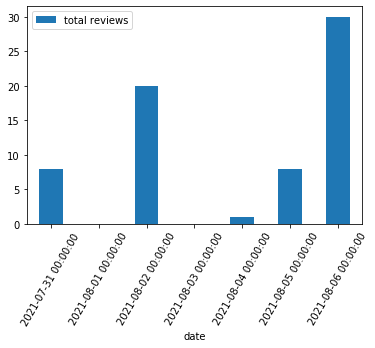

In [7]:
import datetime



today = pd.to_datetime("today").round('1d')
print(type(today))
week_range = pd.date_range(today-pd.Timedelta(days=6),today,freq='d')
print(week_range)
date2count ={"date":week_range,"total reviews":[0]*7}
for card_stamp in cards_frame["last_reviewed_stamp"]:
    if card_stamp in week_range:
        if card_stamp in date2count["date"]:
            date2count["total reviews"][list(week_range).index(card_stamp)] += 1
            

datesframe = pd.DataFrame(date2count)
datesframe.plot.bar(x='date', y='total reviews', rot=60)
